<a href="https://colab.research.google.com/github/fernandodeeke/epidemias/blob/main/sir_model_disc_ns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

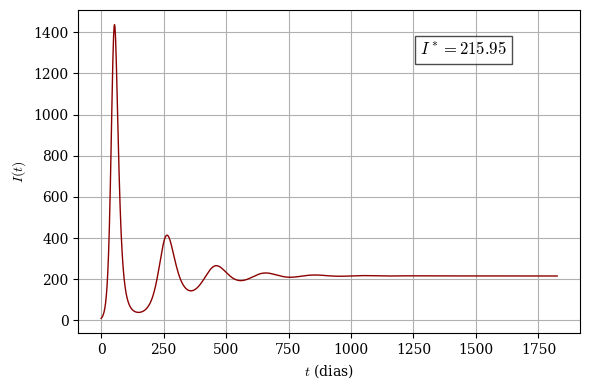

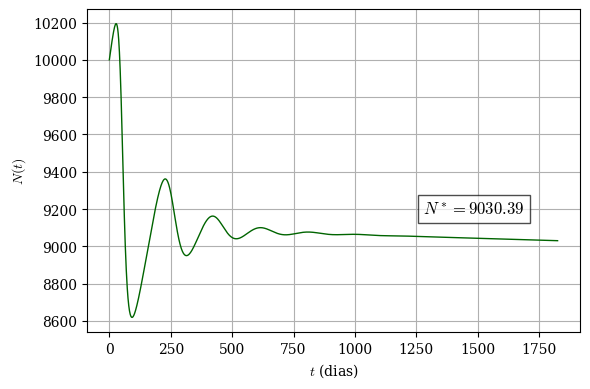

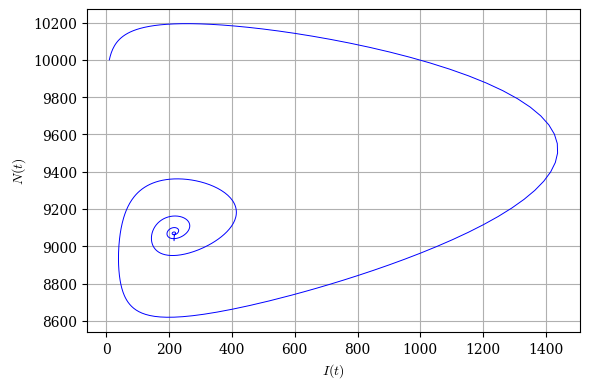

Valor final de I(t) em T = 1825 dias: 215.95
Valor final de N(t) em T = 1825 dias: 9030.39
Gráficos salvos como:
 - sir_I_t.png
 - sir_N_t.png
 - sir_phase_diagram.png


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Configurações gráficas
plt.rc('text', usetex=False)
plt.rc('font', family='serif')
plt.rc('mathtext', fontset='cm')

def sir_disc(beta, gamma, nu, mu, alpha, N0, I0, R0, T):
    passos = int(T) + 1
    S, I, R, N = np.zeros(passos), np.zeros(passos), np.zeros(passos), np.zeros(passos)
    t = np.linspace(0, T, passos)
    S[0], I[0], R[0] = max(0, N0 - I0 - R0), I0, R0
    N[0] = S[0] + I[0] + R[0]
    for k in range(passos - 1):
        N[k] = S[k] + I[k] + R[k]
        S[k+1] = S[k] + (nu * N[k] - beta * S[k] * I[k] / N[k] - mu * S[k])
        I[k+1] = I[k] + (beta * S[k] * I[k] / N[k] - gamma * I[k] - (mu + alpha) * I[k])
        R[k+1] = R[k] + (gamma * I[k] - mu * R[k])
        N[k+1] = S[k+1] + I[k+1] + R[k+1]
    return t, S, I, R, N

def plot_phase_diagram(beta, gamma, nu, mu, alpha, N0, I0, R0, T):
    t, S, I, R, N = sir_disc(beta, gamma, nu, mu, alpha, N0, I0, R0, T)
    I_final = I[-1]
    N_final = N[-1]

    # Gráfico 1: I(t)
    plt.figure(figsize=(6, 4), dpi=100)
    plt.plot(t, I, color='darkred', lw=1)
    plt.xlabel('$t$ (dias)')
    plt.ylabel('$I(t)$')
    plt.grid(True)
    plt.text(0.7 * T, 0.9 * max(I), f'$I^* = {I_final:.2f}$', fontsize=12, bbox=dict(facecolor='white', alpha=0.7))
    plt.tight_layout()
    plt.savefig("sir_I_t.png", dpi=300)
    plt.show()

    # Gráfico 2: N(t)
    plt.figure(figsize=(6, 4), dpi=100)
    plt.plot(t, N, color='darkgreen', lw=1)
    plt.xlabel('$t$ (dias)')
    plt.ylabel('$N(t)$')
    plt.grid(True)
    plt.text(0.7 * T, 0.9 * max(N), f'$N^* = {N_final:.2f}$', fontsize=12, bbox=dict(facecolor='white', alpha=0.7))
    plt.tight_layout()
    plt.savefig("sir_N_t.png", dpi=300)
    plt.show()

    # Gráfico 3: Diagrama de fase
    plt.figure(figsize=(6, 4), dpi=100)
    plt.plot(I, N, color='blue', lw=0.7)
    #plt.plot(I_final, N_final, 'ro', label='Equilíbrio')
    plt.xlabel('$I(t)$')
    plt.ylabel('$N(t)$')
    plt.grid(True)
    #plt.legend()
    plt.tight_layout()
    plt.savefig("sir_phase_diagram.png", dpi=300)
    plt.show()

    print(f"Valor final de I(t) em T = {T} dias: {I_final:.2f}")
    print(f"Valor final de N(t) em T = {T} dias: {N_final:.2f}")
    print("Gráficos salvos como:")
    print(" - sir_I_t.png")
    print(" - sir_N_t.png")
    print(" - sir_phase_diagram.png")

# Executar exemplo
plot_phase_diagram(beta=0.3, gamma=0.122, nu=0.0082, mu=0.0072, alpha=0.0420,
                   N0=10000, I0=10, R0=0, T=5*365)

